In [1]:
import  pandas as pd 

import sys 
import numpy as np

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor

import shap

import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

c:\Users\akhma\Desktop\Project\.project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_train = pd.read_csv("../data/train.csv")
print(df_train.head())

df_test = pd.read_csv("../data/test.csv")
print(df_test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
# drop "ID" column. It has importance only for database
df_train.drop("Id", axis=1, inplace=True)

In [4]:
# Look Statistik (all looks fine)
print(df_train.describe())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

In [5]:
# Check Null values
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:


# Print all columns with null values
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_train.isna().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageType         81
GarageFinish       81
GarageCond         81
GarageYrBlt        81
BsmtExposure       38
BsmtFinType2       38
BsmtQual           37
BsmtFinType1       37
BsmtCond           37
MasVnrArea          8
Electrical          1
BldgType            0
Neighborhood        0
LandSlope           0
Condition2          0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
LotConfig           0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodAdd        0
OverallQua

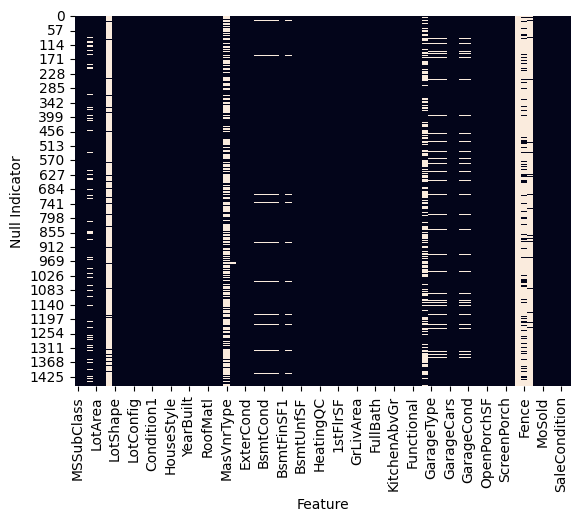

In [7]:
# Analyzing the patterns of missing value occurrence

sns.heatmap(df_train.isnull(), cbar=False)
plt.xlabel('Feature')
plt.ylabel('Null Indicator')
plt.show()

# One can see that some columns have a big persantage of NULL values:
# Alley, Exterior2nd, FireplaceQU, POOLQc, MiscVal and others.

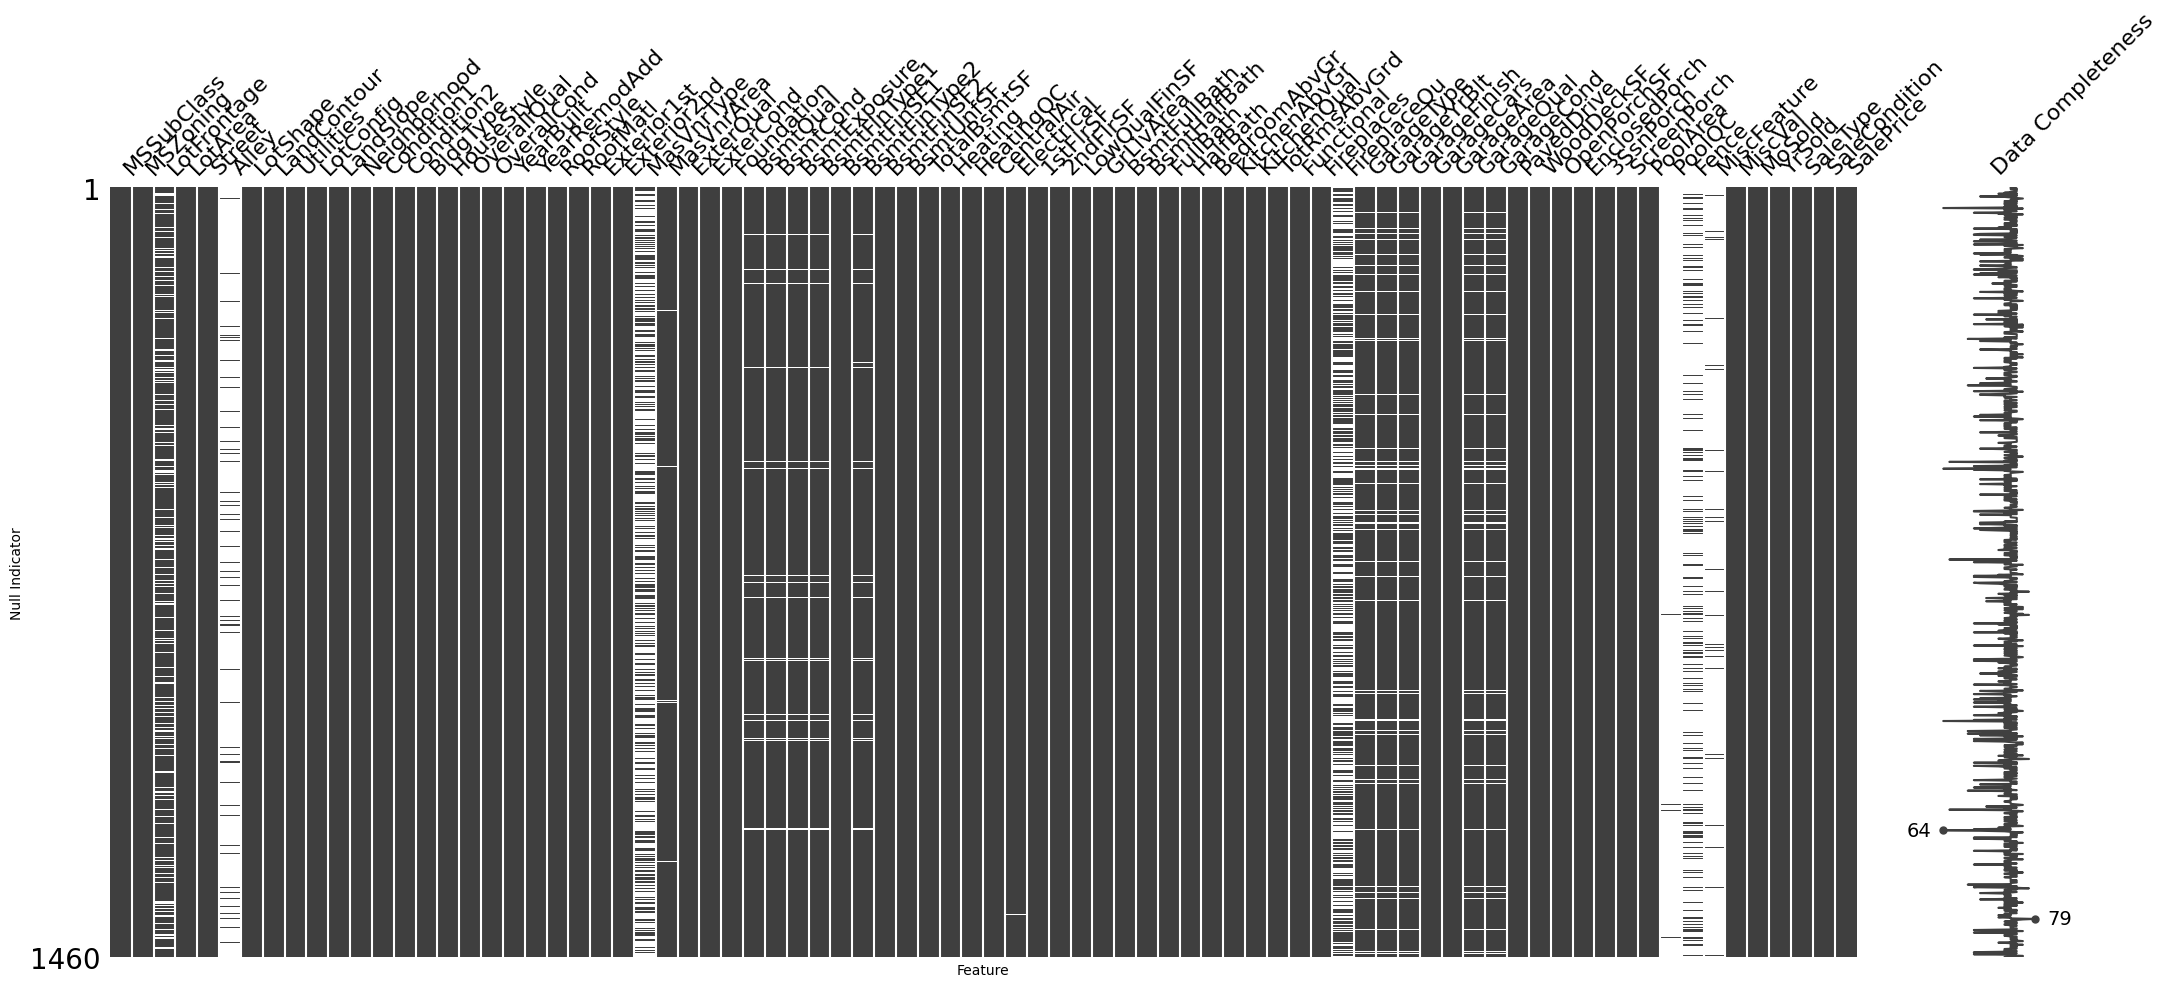

In [8]:
# Analyzing the patterns of missing value occurrence
msno.matrix(df_train, labels=True)

plt.xlabel('Feature')
plt.ylabel('Null Indicator')
plt.show()

# Hier one can see better all NULL Values

<Axes: >

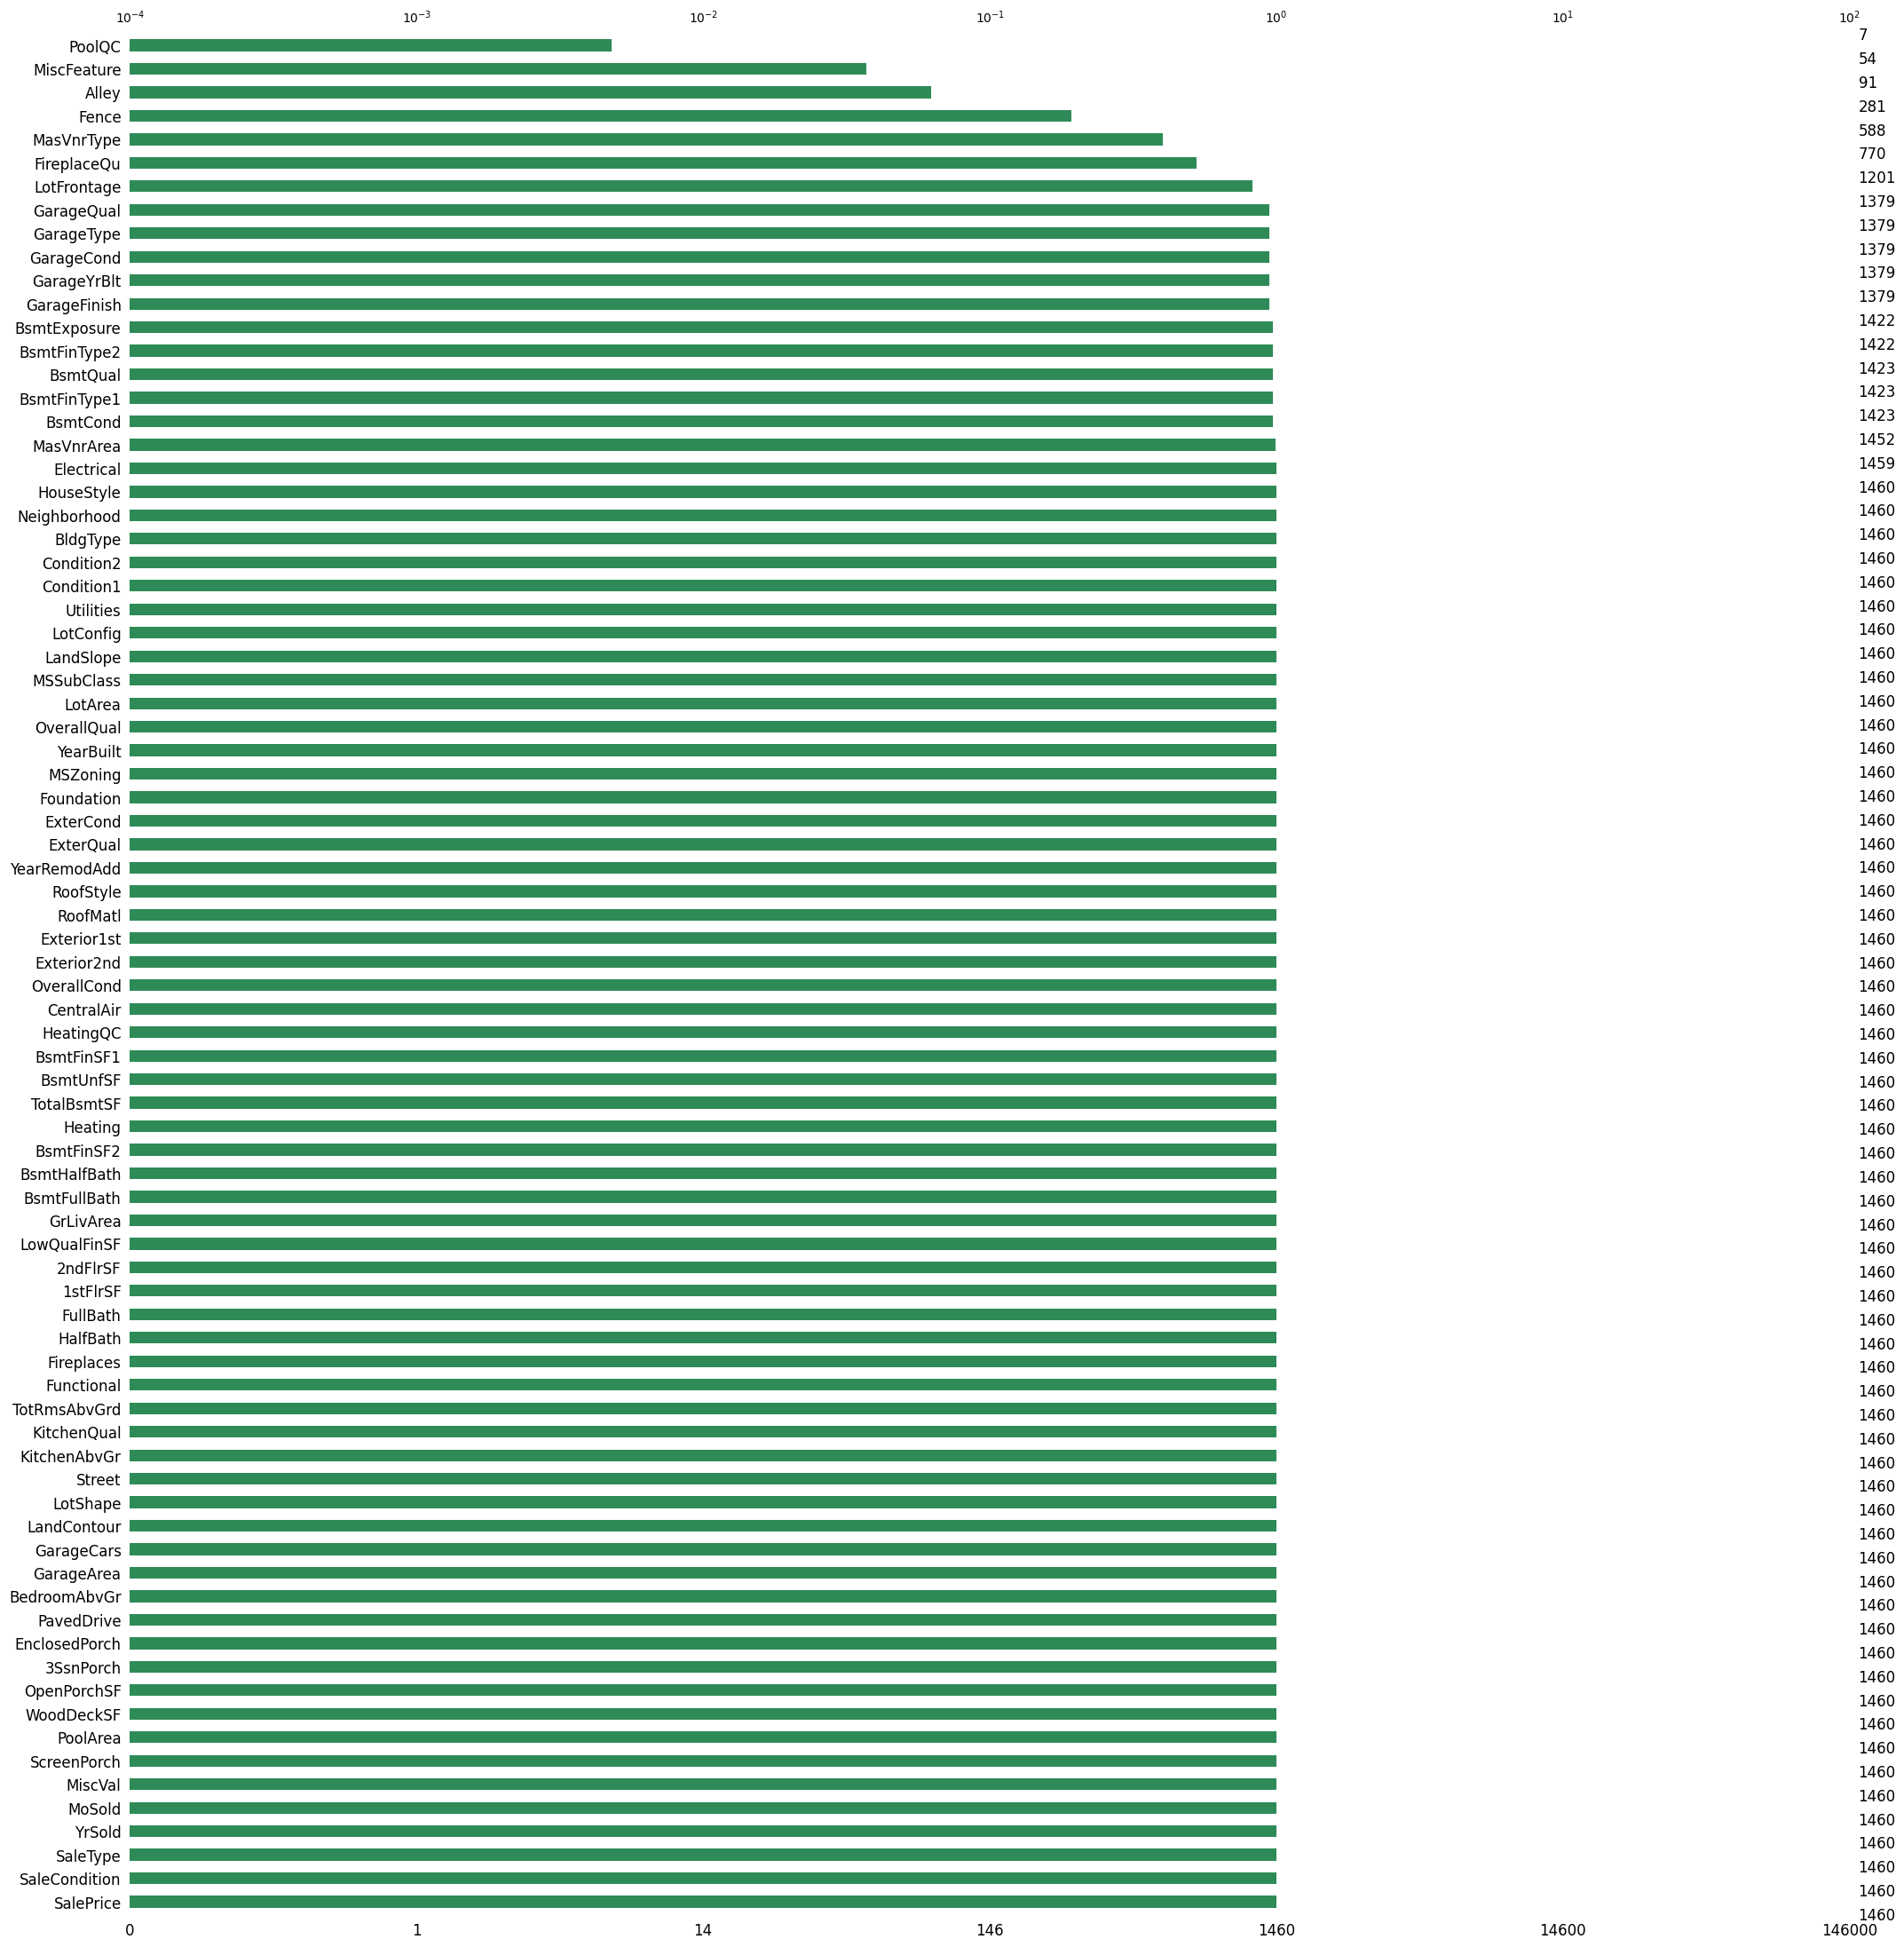

In [9]:
# Analyzing the patterns of missing value occurrence
msno.bar(df_train, fontsize=12, color="seagreen", log=True, sort="descending")

<Axes: >

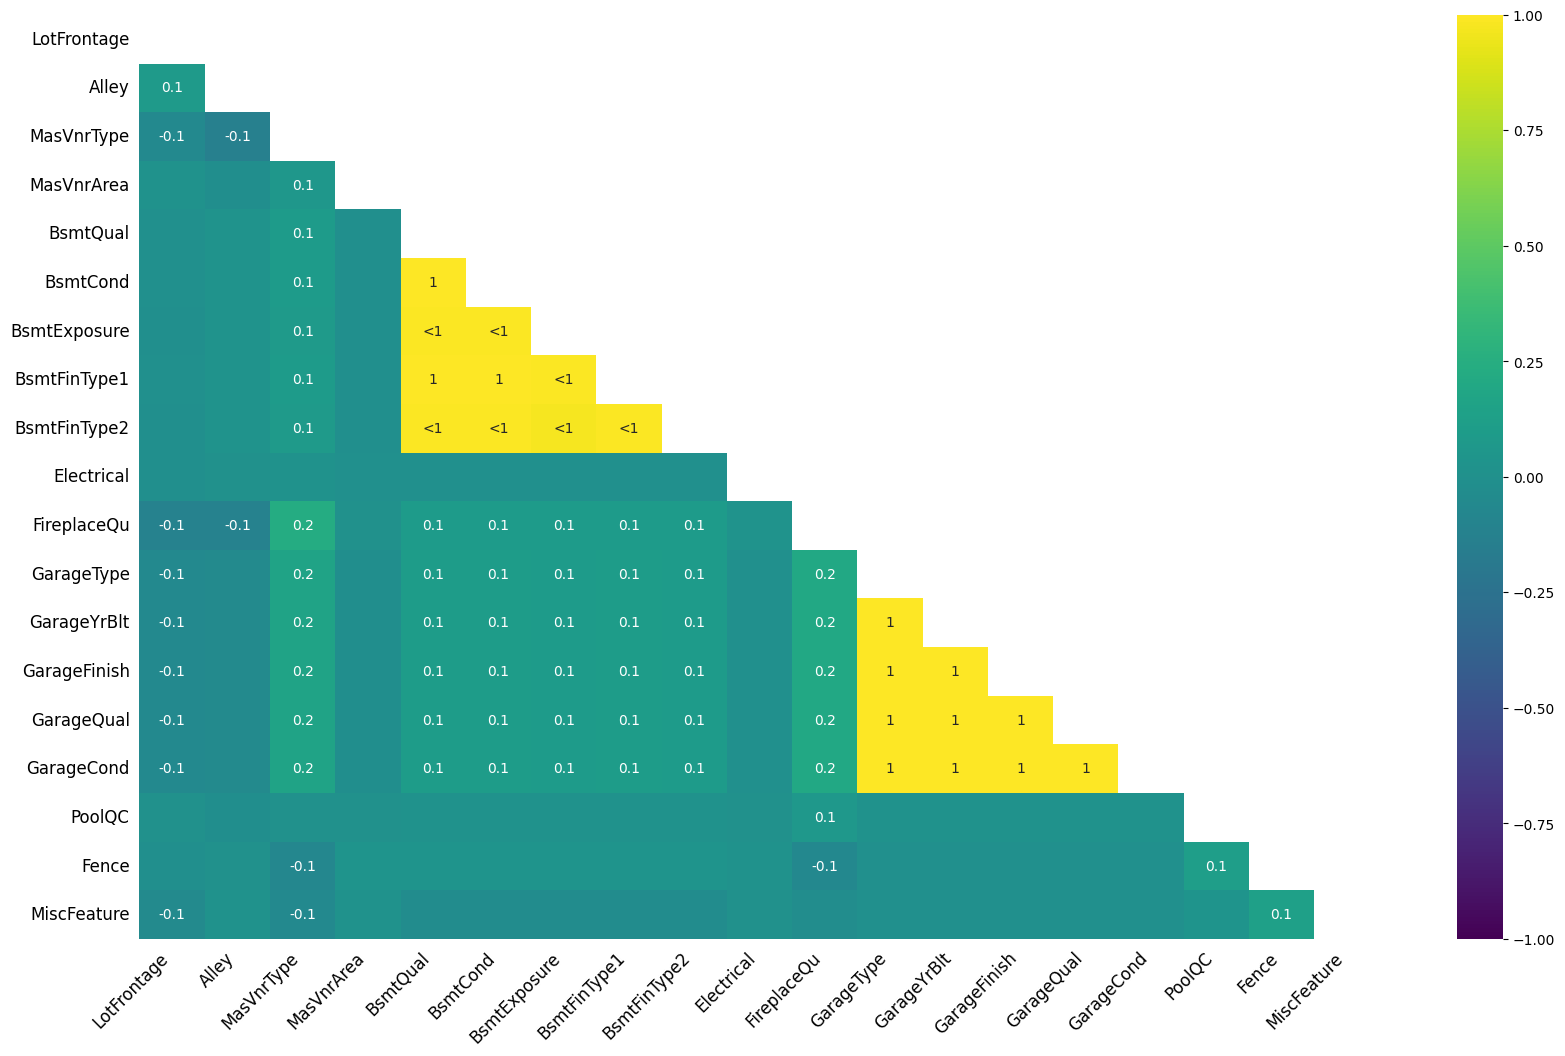

In [10]:
# Nulity correlation 
# how strongly the presence or absence of one variable affects the presence of another.
msno.heatmap(df_train, cmap="viridis", fontsize=12)

# There are 2 Groups of values which are either all there or are all absent:
# 1. BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# 2. GarageFinishBlt, GarageFinish, GarageQual, GarageCond

In [ ]:
msno.dendrogram(df_train)

### Columns with many empty values are:
1. PoolQC - 1453 - Pool quality
2. MiscFeature - 1406 - Miscellaneous feature not covered in other categories
3. Alley - 1369 -Type of alley access to property (mayby no access), 
4. Fence - 1179 - Fence quality
5. MasVnrType - 872 - Masonry veneer type
6. FireplaceQu - 690 - Fireplace quality - is NAN if there are no fireplace
7. LotFrontage - 259 - Linear feet of street connected to property
8. GarageQual - 81 - Garage quality
9. GarageFinish - 81 - Interior finish of the garage
10. GarageType - 81 - Garage location
11. GarageYrBlt - 81 - Year garage was built
12. GarageCond - 81 - Garage condition
13. BsmtFinType2 - 38 - Rating of basement finished area (if multiple types)
14. BsmtExposure - 38 - Refers to walkout or garden level walls
15. BsmtCond - 37 - Evaluates the general condition of the basement
16. BsmtQual - 37 - Evaluates the height of the basement
17. BsmtFinType1 - 37 - Rating of basement finished area
18. MasVnrArea - 8 - Masonry veneer area in square feet
19. Electrical - 1 - Electrical system

We are going to analyse whether values are missing by chance or there is some pattern


In [ ]:
# 1. PoolQC
df_train[df_train["PoolQC"].isna()]["PoolArea"].describe()

# Pool Quality is NAN always if there is no pool
# Can it be set "NA	- No Pool"?

In [ ]:
# 2.
# MiscFeature is NAN if (maybe) there is no additional features in the house
# Can it be set to "NA"?

In [ ]:
# 3. Alley
# If Alley is NAN maybe there is no alley to the house
# Can it be set to "NA"?


In [ ]:
# 4. Fence
# IF there is no information about a fence - can one suppose there is no fence?
# Can it be set to "NA"?

In [ ]:
# 6. FireplaceQu
df_train[df_train["FireplaceQu"].isna()]["Fireplaces"].describe()

# Since fireplace quality is NAN if there are no fireplaces
# Can it be set to "NA"?

In [ ]:
# 5. MasVnrType, 18. MasVnrArea
print("\n If there are not zero values of MasVnrArea where MasVnrType = NAN")
print(df_train[df_train["MasVnrType"].isna()]["MasVnrArea"].sort_values(ascending=False))

print("\n Statistics MasVnrArea where MasVnrType = NAN")
print(df_train[df_train["MasVnrType"].isna()]["MasVnrArea"].describe())

print("\n All not zero values of MasVnrArea where MasVnrType = NAN")
# There are 2 Values equal to 1. Is it fine?
print(df_train[df_train["MasVnrType"].isna() & df_train["MasVnrArea"] > 0]["MasVnrArea"])

print("\n All not zero values MasVnrType where MasVnrArea  = 0")
# There are 0 Values of MasVnrArea for given MasVnrType. Is it fine?
print(df_train[df_train["MasVnrArea"] == 0]["MasVnrType"].describe())

# Can MasVnrType be set to "None" if MasVnrArea is NAN or 0 or 1?
# Can MasVnrArea be set to 0, if NAN?

In [ ]:
# 7. LotFrontage
# If there is no footage for the street connected to the property - what to do?
# Min Value is 21.000000. Maybe that means, there is no street connected to the property?
# Can it be?
print(df_train["LotFrontage"].describe())
# Can it be set to 0 if NAN?

In [ ]:
# 8. GarageQual 
# 9. GarageFinish 
# 10. GarageType 
# 11. GarageYrBlt
# 12. GarageCond 

# Columns 8 - 12 are null if there is no Garage

print(df_train[df_train["GarageQual"].isna()][["GarageCars", "GarageArea"]].describe())

# if there is no garage hte columns 8 - 12 will be NAN
print(df_train[df_train["GarageCars"] == 0]["GarageQual"].describe())

# Can it be set to GarageQual = NA
#                  GarageFinish = NA
#                  GarageType = NA
#                  GarageCond = NA
#                  GarageYrBlt = ????????????
# if GarageCars == 0

In [ ]:
# 13. BsmtFinType2 
# 14. BsmtExposure 
# 15. BsmtCond c
# 16. BsmtQual 
# 17. BsmtFinType1


In [ ]:
clmns_ = ["BsmtQual", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF"]
print(df_train[df_train["BsmtFinType2"].isna()][clmns_].describe())
# BsmtFinType2 can be set to "NA", if TotalBsmtSF == 0 or the top if BsmtFinSF1 == 0?

print(df_train[df_train["BsmtFinSF1"] == 0]["BsmtFinType2"].describe())

In [ ]:
print(df_train[df_train["BsmtExposure"].isna()][clmns_].describe())
# BsmtExposure can be set to "NA", if TotalBsmtSF == 0 or the top if BsmtFinSF1 == 0?

print(df_train[df_train["BsmtFinSF1"] == 0]["BsmtExposure"].describe())

In [ ]:
print(df_train[df_train["BsmtCond"].isna()][clmns_].describe())
# BsmtCond can be set to "NA", it means TotalBsmtSF == 0

In [ ]:
print(df_train[df_train["BsmtQual"].isna()][clmns_].describe())
# BsmtQual can be set to "NA", it means TotalBsmtSF == 0

In [ ]:
print(df_train[df_train["BsmtFinType1"].isna()][clmns_].describe())

# BsmtFinType1 can be set to "NA", it means that TotalBsmtSF == 0

In [ ]:
# 19. Electrical system - only 1 is null
# This row can be removed

In [11]:
def clean_dataset(data_set):

    # 1. PoolQC: NAN -> "NA"
    data_set["PoolQC"] = data_set["PoolQC"].fillna("NA")
    
    # 2. MiscFeature : NAN -> "NA"
    data_set["MiscFeature"] = data_set["MiscFeature"].fillna("NA")
    
    # 3. Alley : NAN -> "NA" ??????????????
    data_set["Alley"] = data_set["Alley"].fillna("NA")
    
    # 4. Fence : NAN -> "NA" ???????? Or MOD
    data_set["Fence"] = data_set["Fence"].fillna("NA")
    
    # 5. MasVnrType : NAN -> "NA", 18. MasVnrArea : NAN -> 0 ???????? Or MOD
    #MasVnrArea : NAN -> 0 ???????? Or MOD
    data_set["MasVnrArea"] = data_set["MasVnrArea"].fillna(0)

    # MasVnrType: NAN -> "None" if MasVnrArea = NAN or 0 ( or 1)?
    data_set["MasVnrType"] = data_set[data_set["MasVnrArea"].isna() | data_set["MasVnrArea"] == 0]["MasVnrType"].fillna("None")
    # Fill in the rest of MasVnrType with MODE
    data_set["MasVnrType"] = data_set["MasVnrType"].fillna(data_set["MasVnrType"].mode()[0])

    # MasVnrArea: NAN -> 0?
    #data_set["MasVnrArea"] = data_set["MasVnrArea"].fillna(0)
    
    # 6. FireplaceQu : NAN -> "NA"
    data_set["FireplaceQu"] = data_set["FireplaceQu"].fillna("NA")
    
    # 7. LotFrontage : NAN -> 0   ???????????????????? is it fine?
    data_set["LotFrontage"] = data_set["LotFrontage"].fillna(0)
    
    # 8. GarageQual : NAN -> "NA"
    # 9. GarageFinish : NAN -> "NA"
    # 10. GarageType : NAN -> "NA"
    # 11. GarageYrBlt : ????????
    # 12. GarageCond  : NAN -> "NA"
    # if GarageCars == 0

    '''print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("GarageQual\n", data_set[data_set["GarageQual"].isna()]["GarageCars"].sort_values(ascending=False))
    print("GarageFinish\n", data_set[data_set["GarageFinish"].isna()]["GarageCars"].sort_values(ascending=False))
    print("GarageType\n", data_set[data_set["GarageType"].isna()]["GarageCars"].sort_values(ascending=False))
    print("GarageCond\n", data_set[data_set["GarageCond"].isna()]["GarageCars"].sort_values(ascending=False))'''

    mean_garage_cars = np.floor(data_set["GarageCars"].mean())
    data_set["GarageCars"] = data_set["GarageCars"].fillna(mean_garage_cars)

    garage_columns = ["GarageQual", "GarageFinish", "GarageType", "GarageCond"]
    
    data_set.loc[data_set.index[data_set["GarageCars"] == 0].tolist(), garage_columns]= "NA"
    
    
    #can one delete "GarageYrBlt" column ?????
    
    # 13. BsmtFinType2 : NAN -> "NA" if TotalBsmtSF == 0 or the top if BsmtFinSF1 == 0?
    # 14. BsmtExposure: NAN -> "NA" if TotalBsmtSF == 0 or the top if BsmtFinSF1 == 0?
    # 15. BsmtCond : NAN -> "NA" if TotalBsmtSF == 0
    # 16. BsmtQual : NAN -> "NA" if TotalBsmtSF == 0
    # 17. BsmtFinType1: NAN -> "NA" if TotalBsmtSF == 0

    bsmt_columns = ["BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1"]
    data_set.loc[data_set.index[data_set["TotalBsmtSF"] == 0].tolist(), bsmt_columns]= "NA"

    bsmt_columns = ["BsmtFinType2", "BsmtExposure"]
    data_set.loc[data_set.index[data_set["BsmtFinSF1"] == 0].tolist(), bsmt_columns]= "NA"

    data_set["BsmtFinType2"] = data_set["BsmtFinType2"].fillna(data_set["BsmtFinType2"].mode()[0])
    #with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    #    print(data_set[data_set["BsmtFinType2"].isna()][["BsmtFinSF1","TotalBsmtSF"]])

    # 19. Electrical system - row with NAN can be removed
    data_set.drop(data_set[data_set["Electrical"].isna()].index, inplace = True) 




In [12]:
# Clean the train set
df_train_cleaned = df_train.copy()


clean_dataset(df_train_cleaned)

print("\nDataset after the cleaning")
# Print all columns with null values
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_train_cleaned.isna().sum().sort_values(ascending=False))


Dataset after the cleaning
GarageYrBlt      81
MSSubClass        0
LotFrontage       0
MSZoning          0
Street            0
Alley             0
LotShape          0
LotArea           0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
LandContour       0
HouseStyle        0
OverallQual       0
YearBuilt         0
OverallCond       0
RoofStyle         0
RoofMatl          0
Exterior1st       0
YearRemodAdd      0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
Exterior2nd       0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtExposure      0
BsmtHalfBath

In [13]:
print(df_train_cleaned)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave    NA      Reg   
1             20       RL         80.0     9600   Pave    NA      Reg   
2             60       RL         68.0    11250   Pave    NA      IR1   
3             70       RL         60.0     9550   Pave    NA      IR1   
4             60       RL         84.0    14260   Pave    NA      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave    NA      Reg   
1456          20       RL         85.0    13175   Pave    NA      Reg   
1457          70       RL         66.0     9042   Pave    NA      Reg   
1458          20       RL         68.0     9717   Pave    NA      Reg   
1459          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...  

### Some features with numeric type Integer are categorical:
1. "MSSubClass" is a nominal categorical feature
2. "OverallQual" is a ordinal categorical feature
3. "OverallCond" is a ordinal categorical feature

We change their type to categorical

In [14]:
clmns = ["MSSubClass", "OverallQual", "OverallCond"]
df_train_cleaned[clmns] = df_train_cleaned[clmns].astype("category")


In [15]:
print(df_train_cleaned[clmns])

     MSSubClass OverallQual OverallCond
0            60           7           5
1            20           6           8
2            60           7           5
3            70           7           5
4            60           8           5
...         ...         ...         ...
1455         60           6           5
1456         20           6           6
1457         70           7           9
1458         20           5           6
1459         20           5           6

[1459 rows x 3 columns]


### Combine some features together

In [16]:
df_train_cleaned["TotalFlrSF"] = df_train_cleaned["1stFlrSF"] + df_train_cleaned["2ndFlrSF"]
df_train_cleaned.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

df_train_cleaned["TotalFullBath"] = df_train_cleaned["FullBath"] + df_train_cleaned["BsmtFullBath"]
df_train_cleaned.drop(["FullBath", "BsmtFullBath"], axis=1, inplace=True)

df_train_cleaned["TotalHalfBath"] = df_train_cleaned["HalfBath"] + df_train_cleaned["BsmtHalfBath"]
df_train_cleaned.drop(["HalfBath", "BsmtHalfBath"], axis=1, inplace=True)

In [17]:
print(df_train_cleaned)

     MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0     8450   Pave    NA      Reg   
1            20       RL         80.0     9600   Pave    NA      Reg   
2            60       RL         68.0    11250   Pave    NA      IR1   
3            70       RL         60.0     9550   Pave    NA      IR1   
4            60       RL         84.0    14260   Pave    NA      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455         60       RL         62.0     7917   Pave    NA      Reg   
1456         20       RL         85.0    13175   Pave    NA      Reg   
1457         70       RL         66.0     9042   Pave    NA      Reg   
1458         20       RL         68.0     9717   Pave    NA      Reg   
1459         20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub    Inside  ...          NA   

In [18]:
# Save the cleaned and modified DataFrame to use it in another notebook
%store df_train_cleaned

Stored 'df_train_cleaned' (DataFrame)


### Analyse the distribution of numeric features

In [ ]:
for clmn in df_train_cleaned.select_dtypes(include=np.number).columns:
    sns.histplot(df_train_cleaned, x=clmn)
    plt.show()

1. Many data with "LotFrontage" almost zero, the rest is like normal distribution with an extreme
2. "LotArea" - normal distribution right-skewed
3. "MassVnrArea" - many almost zero data, the rest is normal distribution right-skewed
4. "BsmtFinSF1" - many almost zero data, the rest is normal distribution right-skewed
5. "BsmtFinSF2" - many almost zero data, the rest is normal distribution right-skewed, very low
    it may have no big impact on the price 
6. "BsmtUnfSF" - Decrease, is almost 0 after 2000 sq feet 
7. "TotalBsmtSF" - many almost zero data, the rest is normal distribution right-skewed 
8. "LowQualFinSF" - almost only zero data. Perhaps has no much impact on the target feature 
9. "GrLivArea" - normal distribution right-skewed  
9. "Bedroom" - normal distribution 
10. "Kitchen" - has only 1 peak value = 1, the rest is almost 0 
11. "TotRmsAbvGrd" - normal distribution right-skewed  
12. "Fireplaces" - Decreease 
13. "GarageYrBlt" - increase
14. "GarageCars" - normal distribution right-skewed  
15. "GarageArea" - many almost zero data, the rest is normal distribution right-skewed 
16. "WoodDeckSF"  - many almost zero data, the rest is normal distribution right-skewed 
17. "OpenPorchSF" - many almost zero data, the rest is normal distribution right-skewed 
18. "EnclosedPorch" -many almost zero data, the rest is normal distribution right-skewed with low values
19. "3SsnPorch" - almost all data are close to zero
20. "ScreenPorch" - almost all data are close to zero
21. "PoolArea" - almost all data are close to zero
22. "MiscFeature" - almost all data are close to zero
23. "MoSold" - normal distribution right-skewed with low values 
24. "YrSold" - uniform distribution 
25. "TotalFlrSF" - normal distribution right-skewed 
26. "TotalFullBath" - normal distribution right-skewed 
25. "TotalHalfBath" - decrease 
26. "SalesPrice" - normal distribution right-skewed 

In [ ]:

# Draw a correlation between numerical features and SalePrice
fig, ax = plt.subplots()

corr_matrix = df_train_cleaned.select_dtypes(include=np.number).corr()

df_correlarion_with_price = corr_matrix\
                                .loc[["SalePrice"]]\
                                .drop("SalePrice", axis=1)

sns.heatmap(data=df_correlarion_with_price, 
            ax=ax, 
            xticklabels=True, 
            yticklabels=True)
plt.show()

# High correlation is only positive

# Find column names, which has correlation greater than correlation_min = 0.5
correlation_min = 0.5
clms_high_correlation = df_correlarion_with_price[df_correlarion_with_price >= correlation_min]\
                            .dropna(how='all', axis=1)\
                            .columns.tolist()

print(df_correlarion_with_price[df_correlarion_with_price >= correlation_min])

print(clms_high_correlation)
# The following columns have a strong linear impact on the sal price:
#'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'

In [ ]:
print(df_correlarion_with_price[["LotArea", "BsmtFinSF1", "Fireplaces"]])

In [ ]:
# Check features wihch correlate to each other to reduce features (only numeric features)

df_correlarion_without_price = corr_matrix\
                                    .drop("SalePrice", axis=1)\
                                    .drop("SalePrice", axis=0)

fig, ax = plt.subplots()                                        
sns.heatmap(data=df_correlarion_without_price, 
            ax=ax, 
            xticklabels=True, 
            yticklabels=True)
plt.show()

In [ ]:
#  Find all pairs where correlation is  between .75 and 1
corr_indexes = df_correlarion_without_price[(df_correlarion_without_price > 0.75) & (df_correlarion_without_price < 1)]\
            .dropna(how='all', axis=1)\
            .dropna(how='all')\
            .stack()\
            .index\
            .tolist()

corr_indexes_set = list(map(tuple, set(map(frozenset, corr_indexes))))

print("\nCorrelated features")
print(corr_indexes_set)

# high correlated pairs of features are:
# ('1stFlrSF', 'TotalBsmtSF'), ('GarageYrBlt', 'YearBuilt'), ('GrLivArea', 'TotRmsAbvGrd'), ('GarageArea', 'GarageCars')

# Make a list of features which can be omitted, because correlated feature will be used instead
clms_to_be_omitted = ["1stFlrSF", "GarageYrBlt", "TotRmsAbvGrd", "GarageArea"]
clms_to_be_preserved = ["TotalBsmtSF", "YearBuilt", "GrLivArea", "GarageCars"]

# Features which have impacte on sales price:
# 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 
# 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'

# find clms_to_be_omitted which are in clms_high_correlation
clms_to_replace = set(clms_high_correlation).intersection(set(clms_to_be_omitted))
clms_to_add = [clms_to_be_preserved[clms_to_be_omitted.index(clmn)] for clmn in list(clms_to_replace)]
print("\nFeatures to be replaced with correlated features")
print(clms_to_replace)
print("\nFeatures to be added to important numeric features")
print(clms_to_add)

# That are the numericcolumns which are important for the analysis
clmns_not_to_replace = set(clms_high_correlation).difference(set(clms_to_be_omitted))
clmns_numeric = list(clmns_not_to_replace.union(set(clms_to_add)))
print(clmns_numeric)


In [ ]:
# One more time draw histogram and scatterplot for the chosen numeric features
for clmn in clmns_numeric:
    fig, axs = plt.subplots(ncols=2)
    sns.histplot(df_train_cleaned, x=clmn, ax=axs[0])
    sns.scatterplot(df_train_cleaned, x=clmn, y="SalePrice", ax=axs[1])
    plt.tight_layout()
    plt.show()

In [ ]:
# What conclusion can one draw from that???????????????????????????

### Now analyse categorical features to choose the important ones.

In [ ]:
# Now we have to choose categorcal variables which are important for us
df_train_categorical = df_train_cleaned.select_dtypes(exclude=np.number)


categorical_columns_all = df_train_categorical.columns.tolist()

print(categorical_columns_all)


In [ ]:
for clmn in categorical_columns_all:
    fig, axs = plt.subplots(ncols=3)
    sns.countplot(df_train_cleaned, x=clmn, ax=axs[0])
    sns.barplot(df_train_cleaned, x=clmn, y="SalePrice", ax=axs[1])
    sns.scatterplot(df_train_cleaned, x=clmn, y="SalePrice", ax=axs[2])
    plt.tight_layout()
    plt.show()

### From the plots one can conclude that the following features has influence on the sale price:
1. "MSSubClass" could influence the sale price
2. "MSZoning"
3. "Street" ??????????????????????
4. "LotShape" have not a big influence on the sale 
5. "LandContour"
6. "Utilities"
7. "Neighborhood"
8. "Condition1"
9. "Condition2"
10. "BldgType"
11. "HouseStyle"
12. "OverallQual"
13. "OverallCond"
14. "RoofStyle"
15. "RoofMatl"
16. "Exterior1st"
17. "Exterior2st"
18. "MasVnrType"
19. "ExterQual"
20. "ExterCond"
21. "Foundation"
22. "BsmtQual"
23. "BsmtCond"
24. "BsmtExposure"
25. "Heating"
26. "HeatingQC"
27. "CentralAir"
28. "Electrical"
29. "KitchenQual"
30. "FireplaceQu"
31. "GarageType"
32. "GarageFinish"
33. "GarageQual"
34. "GarageCond"
35. "PavedDrive"
36. "PoolQC"
37. "SaleType"
38. "SaleCondition"

### The feauture which can be neglected are the following:
1. "Alley" - da es bei "NA" value wird der Preice hoch, hat es vermutlich Einfluss
2. "LotConfig"
3. "LandSlope"
4. "BsmtFinType1"
5. "BsmtFinType2"
6. "Functional"
7. "Fence"
8. "MiscFeature"

### With help of CatBoostRegressor we will try to find out which categorical feautures have the most impact in order to reduce the number of features

In [ ]:
# put all categorical features to type String
df_train_cleaned[categorical_columns_all] = df_train_cleaned[categorical_columns_all].astype("category")

print(df_train_cleaned.info())

In [ ]:

# split data to use CatBoostClassifier to find feature importance
# GarageYrBlt feature is removed because there are too many null values if there is no garage
X_train, X_test, y_train, y_test = train_test_split(
    df_train_cleaned.drop(columns=["SalePrice", "GarageYrBlt"]), df_train_cleaned["SalePrice"], test_size=0.33, random_state=42)

In [ ]:
"""from catboost import CatBoostRegressor, Pool

train_dataset = Pool(X_train, y_train) 
test_dataset = Pool(X_test, y_test)

# Data to tune the catBoostRegressor model
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

cat_Boost_Regressor = CatBoostRegressor(loss_function='RMSE')

cat_Boost_Regressor.fit(X_train, y_train, 
                         cat_features = categorical_columns_all)"""

In [ ]:
from catboost import CatBoostRegressor, Pool

cat_Boost_Regressor = CatBoostRegressor(iterations=200,
                                        learning_rate=0.1,
                                        depth=6,
                                        loss_function='RMSE')

cat_Boost_Regressor.fit(X_train, y_train, 
                         cat_features = categorical_columns_all)



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import math

"""# Make predictions
y_pred = cat_Boost_Regressor.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")"""
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

In [ ]:
# Get feature importances (default: Prediction Values Change)
feature_importances = cat_Boost_Regressor.get_feature_importance()

clmns_sorted_by_importance = (list(zip(X_test.columns, feature_importances)))
clmns_sorted_by_importance = sorted(clmns_sorted_by_importance, key=lambda x:x[1], reverse=True)

print("Feature Importances (Prediction Values Change):")
for feature, importance in clmns_sorted_by_importance:
    print(f"{feature}: {importance:.2f}")

# Take the features with importance > 0
clmns_important_features = filter(lambda x:x[1] > 0, clmns_sorted_by_importance)
clmns_important_features = list(map(lambda x:x[0], clmns_important_features))
print(clmns_important_features)

""" Feature Importances (Prediction Values Change):
GrLivArea: 12.25
TotalFlrSF: 10.80
GarageCars: 10.00
ExterQual: 9.51
TotalBsmtSF: 8.30
OverallQual: 5.93
TotalFullBath: 4.09
BsmtFinSF1: 3.98
KitchenQual: 3.29
BsmtQual: 3.03
YearRemodAdd: 2.51
LotArea: 2.40
GarageFinish: 2.31
YearBuilt: 1.58
LandContour: 1.53
Fireplaces: 1.42
TotalHalfBath: 1.16
LotFrontage: 1.12
Neighborhood: 1.04
FireplaceQu: 1.03
SaleCondition: 0.90
OverallCond: 0.87
MSZoning: 0.79
OpenPorchSF: 0.73
BldgType: 0.65
TotRmsAbvGrd: 0.63
WoodDeckSF: 0.62
LotShape: 0.56
BsmtUnfSF: 0.55
GarageType: 0.52
PoolQC: 0.48
GarageQual: 0.43
ScreenPorch: 0.43
MoSold: 0.43
Condition1: 0.40
GarageArea: 0.37
MasVnrType: 0.34
BsmtExposure: 0.26
CentralAir: 0.21
KitchenAbvGr: 0.21
YrSold: 0.19
Functional: 0.19
MasVnrArea: 0.19
Alley: 0.15
Foundation: 0.15
BsmtCond: 0.15
RoofStyle: 0.14
LandSlope: 0.13
RoofMatl: 0.13
Electrical: 0.11
Fence: 0.11
GarageCond: 0.11
LotConfig: 0.10
MSSubClass: 0.07
ExterCond: 0.06
BsmtFinSF2: 0.05
PavedDrive: 0.05
Exterior1st: 0.04
Condition2: 0.04
BedroomAbvGr: 0.03
3SsnPorch: 0.03
BsmtFinType1: 0.03
BsmtFinType2: 0.03
EnclosedPorch: 0.02
LowQualFinSF: 0.02
MiscFeature: 0.01
Heating: 0.01
PoolArea: 0.01
HeatingQC: 0.00
"""

### Try to select important features on the base of feature_importance method

In [ ]:
"""print(fs.get_feature_names_out())
print(type(X_train_fs))
print(categorical_columns_all)"""

In [ ]:
from sklearn.feature_selection import SelectFromModel

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(CatBoostRegressor(iterations=200,
                                        learning_rate=0.1,
                                        depth=6,
                                        loss_function='RMSE',
										cat_features=categorical_columns_all))
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = CatBoostRegressor(iterations=200,
                        learning_rate=0.1,
                        depth=6,
                        loss_function='RMSE')
# Find categorical features

selected_catBoostRegress_columns = fs.get_feature_names_out()
print(selected_catBoostRegress_columns)
categorical_columns_important = list(set(categorical_columns_all)\
									.intersection(set(selected_catBoostRegress_columns)))

print(categorical_columns_important)


model.fit(pd.DataFrame(data=X_train_fs, columns=selected_catBoostRegress_columns),
		  				 y_train, 
                         cat_features = categorical_columns_important)

# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
# Calculate regression metrics
mse = mean_squared_error(y_test, yhat)
r2 = r2_score(y_test, yhat)
explained_variance = explained_variance_score(y_test, yhat)
rmse = math.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

# R_squares and Explained variance Score are slightly better

### CatBoostModel chose the following features

#### Categorical:
1. 'KitchenQual', 
2. 'ExterQual', 
3. 'LandContour', 
4. 'GarageFinish', 
5. 'BsmtQual', 
6. 'OverallQual'

#### Numerical:
1. 'LotArea' 
2. 'YearBuilt' 
3. 'YearRemodAdd'
4. 'BsmtFinSF1' 
5. 'TotalBsmtSF' 
6. 'GrLivArea'
7. 'Fireplaces' 
8. 'GarageCars' 
9. 'TotalFlrSF'
10. 'TotalFullBath'

#### The numeric features selected in the previous steps are:
1. 'GrLivArea', '
2. 'YearBuilt', 
3. 'TotalFullBath', 
4. 'GarageCars', 
5. 'YearRemodAdd', 
6. 'TotalBsmtSF', 
7. 'TotalFlrSF'

That means the model chose 3 more important numeric features:
1. 'LotArea' 
2. 'BsmtFinSF1'
3. 'Fireplaces'

In [ ]:

# Check the correlation between the sale price and the numeric features which the model additionaly selected
print(df_correlarion_with_price[["LotArea", "BsmtFinSF1", "Fireplaces"]])

# Only "Fireplaces" correlation is greater than 0.45. The rest is smaller than 0.4
# There can exist non linear realtionship between ["LotArea", "BsmtFinSF1", "Fireplaces"] and "Sale Price"

In [ ]:
# Choose the numeric and categorical features offered by that model
features_numeric = ['LotArea', 'YearBuilt', 'YearRemodAdd',
                    'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
                    'Fireplaces', 'GarageCars', 'TotalFlrSF',
                    'TotalFullBath']
features_categorical = ['KitchenQual', 'ExterQual', 'LandContour', 'GarageFinish', 'BsmtQual', 'OverallQual']

In [ ]:
# Explain feature importance using SHAP
explainer = shap.Explainer(cat_Boost_Regressor)
#shap_values = explainer.shap_values(X_test)
shap_values = explainer(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size= 0.2)
plt.show()

In [ ]:
#explainer = shap.Explainer(cat_Boost_Regressor)
#shap_values = explainer(X_test)

In [ ]:
print(shap_values[0])

In [ ]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, show=False, max_display=30)

plt.tight_layout()
plt.show()

In [ ]:
# Get important data according to SHAP
#print(shap_values)
vals= np.abs(shap_values.values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head()
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(feature_importance)


#clmns_important_features

In [ ]:
# One can see that thefollowing categorcal features have influence on the sales price:

# 1. ExterQual - ordinal: PO < FA < TA < Gd < Ex
# 2. FireplaceQu - ordinal: NA < PO < FA < TA < Gd < Ex
# 3. MSZoning - nominal
# 4. Alley - nominal
# 5. GarageCond - ordinal: NA < PO < FA < TA < Gd < Ex
# 6. SaleCondition - nominal
# 7. LandSlope - nominal
# 8. BsmtFinType2 - nominal???

# The others features one can neglect because their impact is small

In [ ]:
clmns_categorical = ["ExterQual", "FireplaceQu", "MSZoning",
                     "Alley", "GarageCond", "SaleCondition",
                     "LandSlope", "BsmtFinType2"]

In [ ]:
print(shap_values[0])
shap.plots.waterfall(shap_values[1])

In [ ]:
clmns_to_analyse = clmns_numeric + clmns_categorical
df_cleaned_selected_featured = df_train_cleaned[clmns_to_analyse]
print(df_cleaned_selected_featured)

In [ ]:
# Save the cleaned dataset to train_cleaned.scv file
df_cleaned_selected_featured.to_csv('../data/train_cleaned.csv', index=False)